## Tarea 3

### Montecarlo

#### 1. Integración Montecarlo

La figura 1 muestra una espira de radio a por la que circula una corriente I. El punto P está a una distancia r del centro de la espira con coordenadas esféricas (r, θ, φ). (Problema del Jackson (1988)) Resuelva la componente del potencial en el punto P en términos de las integrales elípticas:

\begin{equation}
A_\phi(r, \theta) = \frac{\mu_0}{4\pi} \frac{4 I a}{\sqrt{a^2+r^2+2ar \sin{\theta}}} \left[\frac{(2-k^2)K(k) - 2E(k)}{k^2}\right]
\end{equation}

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{d\phi}{\sqrt{1-k^{2} \sin^{2} \phi}},\quad E(k)=\int_{0}^{\pi/2} {\sqrt{1-k^2 \sin^{2}{\phi}}} d\phi
\end{equation}

\begin{equation}
k^2 = \frac{4ar \sin{\theta}}{a^2+r^2+2ar\sin{\theta}}
\end{equation}

Aquí $K(k)$ y $E(k)$ son integrales elípticas de primera y segunda especie, respectivamente. Para $a = 1$, $I = 3$ y $μ0/4π = 1$, calcule y grafique:

Iniciamos por definir las funciones presentadas y proponemos una solución usando integración Montecarlo.

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm import tqdm

a = 1
I = 3

# N1 es el valor correspondiente al número de divisiones del intervalo
# N2 es el valor correspondiente a la cantidad de números aleatorios que se usaran para integrar
N1 = 100
N2 = 10000

# Definición de k²
def k_sqr(r, theta):
    return 4*a*r*np.sin(theta)/(a**2+r**2+2*a*r*np.sin(theta))

# Definición del integrando de K
def fK(phi, r, theta):
    return 1/np.sqrt(1-k_sqr(r, theta)*np.sin(phi)**2)

# Definición del integrando de E
def fE(phi, r, theta):
    return np.sqrt(1-k_sqr(r, theta)*np.sin(phi)**2)

# Función para solucionar por Montecarlo
def int_montecarlo(f, inf, sup, N, r, theta):
    
    # Genera un array de números aleatorios con N1 filas y N2 columnas
    # N1 es el valor correspondiente al número de divisiones del intervalo
    # N2 es el valor correspondiente a la cantidad de números aleatorios que se usaran para integrar
    X = np.random.uniform(inf, sup, (N1,N))
    
    # Array para almacenar datos luego de aplicar la función
    fX = np.zeros((N1,N))
    
    # Se escoge una iteración dependiendo de la variable fijada
    # Para r fijo:
    if type(theta) == np.ndarray:
        for i in tqdm(range(N1)):
            # Evalúa uno de los theta con cada uno de los numeros aleatorios generados correspondientes
            fX[i] = f(X[i], r, theta[i])
            
            
    elif type(r) == np.ndarray:
        for i in tqdm(range(N1)):
            fX[i] = f(X[i], r[i], theta)
    
    values = (sup-inf)/N * np.sum(fX, axis = 1)
    #print(values.shape)
    
    return values

def A(r, theta):
    k2 = k_sqr(r, theta)
    
    K = int_montecarlo(fK, 0, np.pi/2, N2, r, theta)
    E = int_montecarlo(fE, 0, np.pi/2, N2, r, theta)
    
    A_var = (4*I*a)/np.sqrt(a**2+r**2+2*a*r*np.sin(theta))*((2-k2)*K - 2*E)/k2 
    return A_var

In [8]:
# Definimos los arrays en los que evaluaremos las funciones
TH = np.linspace(0, np.pi, N1, endpoint = False)
R = np.linspace(0.1, 10, N1)

Ath = A(1, TH)
Ar = A(R, np.pi/3)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 3792.59it/s]
/tmp/ipykernel_1645/2929170691.py:59: RuntimeWarning: invalid value encountered in true_divide
  A_var = (4*I*a)/np.sqrt(a**2+r**2+2*a*r*np.sin(theta))*((2-k2)*K - 2*E)/k2
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 3983.38it/s]


a) $A_\phi(r=1, \theta)$ vs $\theta$

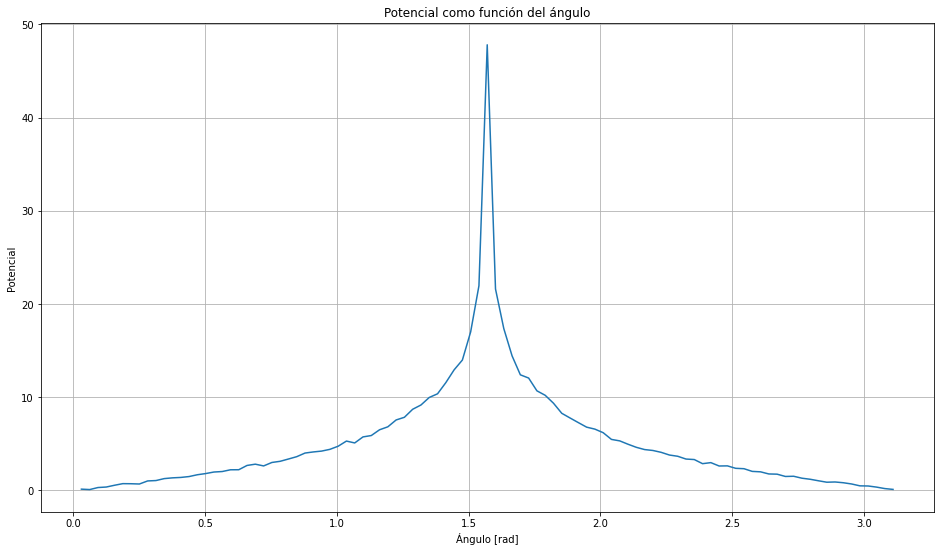

In [9]:
plt.figure(figsize=(16,9))
plt.title("Potencial como función del ángulo")
plt.xlabel("Ángulo [rad]")
plt.ylabel("Potencial")
plt.plot(TH, Ath)
plt.grid()

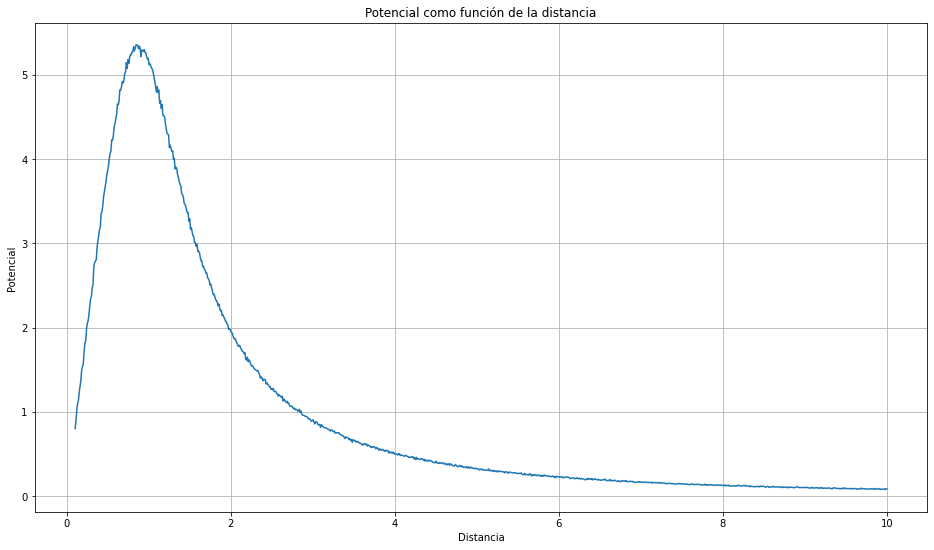

In [140]:
plt.figure(figsize=(16,9))
plt.title("Potencial como función de la distancia")
plt.xlabel("Distancia")
plt.ylabel("Potencial")
plt.plot(R, Ar)
plt.grid()

#### 2. Cálculo del número $\pi$

Considerando el artículo "Estudio del método de Monte Carlo en simulaciones para la estimación del valor de $\pi$", reproduzca cada uno de los cálculos allí mostrados. Algunos ya fueron hechos en clase, ahora modifiquelos y verifique que los datos publicados son ciertos.

**a) Método simple para la estimación de $\pi$**

El método consiste en generar puntos aleatorios dentro de un cuadrado que tiene un círculo circunscrito. El valor de $\pi$ viene dado por:

\begin{equation}
\pi = 4\frac{n}{N}
\end{equation}

donde $n$ es el número de puntos dentro del círculo, y $N$ es el número de puntos totales.

In [72]:
def simple(L, N):
    """
    Función que calcula pi usando la proporción de áreas entre un cuadrado y un círculo.
    L: Longitud del cuadrado
    N: Número de lanzamientos
    """
    
    # Genera posiciones aleatorias dentro de un cuadrado de lado 2L
    X = np.random.uniform(-L, L, N)
    Y = np.random.uniform(-L, L, N)
    
    # Identifica los puntos que cumplen que están dentro del círculo
    puntos_buenos, = np.where((X**2 + Y**2) <= L**2)
    n = len(puntos_buenos)
    
    #print(4*n/N)
    return 4*n/N

In [73]:
print(simple(1,100000))

3.13968


**b) Método de Buffon**

El método consiste en lanzar aguajas de largo $a$ a una red de líneas separadas por una longitud $a$. El valor de $\pi$ vendría dado por:

\begin{equation}
\pi = \frac{2}{P}
\end{equation}

donde P es la probabilidad de que una de las agujas intersecte una de las rayas.

Esta probabilidad puede ser calculada empíricamente, y en eso consiste el siguiente desarrollo.

In [68]:
def Buffon(L, N, l=1):
    """
    Función que calcula pi usando el método de Buffon
    l: longitud de la aguja
    L: Tamaño del espacio para la generación de las posiciones
    N: Número de lanzamientos
    """
    
    X = np.random.uniform(0, L, N)
    
    # Genera un ángulo aleatorio y lo proyecta en el eje x
    theta = np.random.uniform(0, np.pi/2, N)
    # Si bien según el artículo la función usa pi para el cálculo del coseno, este calculo se puede
    # hacer por series u otros métodos, por lo que no representaría un problema
    dx = l/2*np.cos(theta)
    
    corte = 0

    
    for i in range(len(X)):
        # Identifica la línea inferior del punto que se está analizando
        s = int(X[i]//l)
        # Itera para comprobar si esa línea o la siguiente corta a la aguja
        for m in range(s,s+2):
            if (X[i] - dx[i]) <= m*l and (X[i] + dx[i]) >= m*l:
                corte += 1
    P = corte/N
    
    #print(2/P)
    return 2/P

In [69]:
print(Buffon(2, 100000))

3.1323414252153485


**c) Método de Buffon-Laplace**

El método consiste en lo mismo que el método de Buffon, pero ahora consideramos tanto líneas horizontales como verticales equidistanciadas. En este caso, el valor de $\pi$ viene dado por:

\begin{equation}
\pi = \frac{4}{P}
\end{equation}

donde $P$ es la probabilidad de que la aguja intersecte cualquiera de las rectas.

In [70]:
def BuffonLaplace(L, N, l=1):
    """
    Función que calcula pi usando el método de Buffon
    l: longitud de la aguja
    L: Tamaño del espacio para la generación de las posiciones
    N: Número de lanzamientos
    """
    
    X = np.random.uniform(0, L, N)
    Y = np.random.uniform(0, L, N)
    
    theta = np.random.uniform(0, np.pi/2, N)
    dx = l/2*np.cos(theta)
    dy = l/2*np.sin(theta)
    
    corte = 0

    for i in range(len(X)):
        s = int(X[i]//l)
        t = int(Y[i]//l)
        
        for m in range(s,s+2):
            if (X[i] - dx[i]) <= m*l and (X[i] + dx[i]) >= m*l:
                corte += 1
        for m in range(t, t+2):
            if (Y[i] - dy[i]) <= m*l and (Y[i] + dy[i]) >= m*l:
                corte += 1
                
    P = corte/N
    
    #print(4/P)
    return 4/P

In [71]:
print(BuffonLaplace(2, 100000))

3.1447282561695635


Apartir de estas funciones rehagamos los cálculos presentados en el paper.

**i) Comprobación del límite central con método simple**

El teorema indica que el promedio de una sucesión de variables aleatorias independientes e idénticamente distribuidas sigue una distribución normal. 

Para replicar los resultados del artículo, calculamos el valor de $\pi$ n veces por cada método y realizamos un histograma: 

In [97]:
def dist_lim(func, L, N, n):
    """
    Función que devuelve el histograma de la distribución del valor de pi obtenido.
    func: función que calculará a pi
    N: Número de lanzamientos (argumento de la función)
    L: Tamaño del espacio (argumento de la función)
    n: Número de iteraciones para el histograma
    """
    
    
    pi_values = np.zeros(n)
    
    for i in tqdm(range(n)):
        pi_values[i] = func(L, N)
    
    plt.title(f"Estimación de $\pi$ por Montecarlo:\n{n} repeticiones de {N} lanzamientos ")
    plt.xlabel("Valor $\pi$")
    plt.ylabel("Frecuencia")
    plt.hist(pi_values, bins = 40, density=True)
    
    # Gráfica de la gaussiana
    
    vv = np.linspace(min(pi_values), max(pi_values), 5000)
    
    media = pi_values.mean()
    desvest = pi_values.std()
    
    plt.plot(vv, norm.pdf(vv, media, desvest))
    
    print(f"El valor medio obtenido para π es {media} con una desviación estándar de {desvest}")
    
    return pi_values.mean()

Así, los histogramas para distinto número de lanzamientos y repeticiones por el método simple quedan:

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 375.07it/s]


El valor medio obtenido para π es 3.141478 con una desviación estándar de 0.0046423076158307285


3.141478

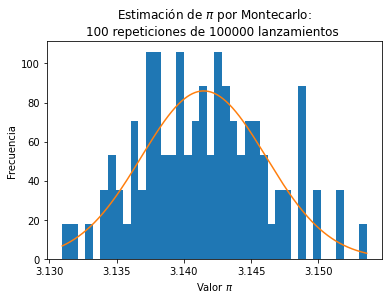

In [98]:
dist_lim(simple, 1, 100000, 100)

100%|██████████████████████████████████████| 3000/3000 [00:07<00:00, 407.19it/s]

El valor medio obtenido para π es 3.1414964666666667 con una desviación estándar de 0.005111415020868051


3.1414964666666667

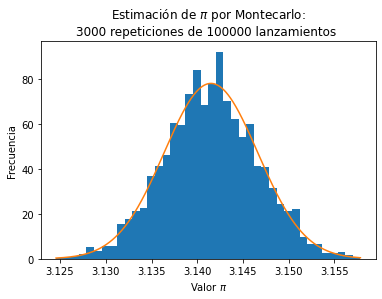

In [99]:
dist_lim(simple, 1, 100000, 3000)

100%|███████████████████████████████████████| 3000/3000 [01:31<00:00, 32.94it/s]

El valor medio obtenido para π es 3.141658518666667 con una desviación estándar de 0.0016312303668248585


3.141658518666667

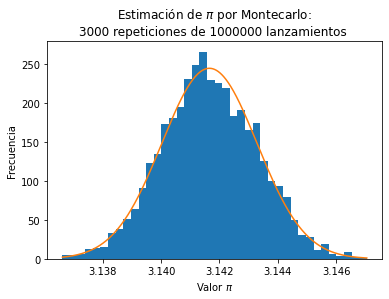

In [100]:
dist_lim(simple, 1, 1000000, 3000)

Las gráficas se asemejan a las presentadas en el artículo.

**ii) Discrepancia del valor**

In [175]:
def discrepancia(Nmax, n):
    
    L = 1
    plt.figure(figsize = (16,9))
    plt.grid()
    
    for i in range(n):
        # Genera posiciones aleatorias dentro de un cuadrado de lado 2L
        X = np.random.uniform(-L, L, Nmax)
        Y = np.random.uniform(-L, L, Nmax)

        # Identifica los puntos que cumplen que están dentro del círculo
        puntos_buenos, = np.where((X**2 + Y**2) <= L**2)
        
        convergencia = []
        cantidad = []
        
        for j in range(500, len(puntos_buenos), 200):
            
            h = len(puntos_buenos[0:j])
            N = puntos_buenos[j]
            
            value = 4*h/N
            discr = (np.pi - value) / np.pi

            cantidad.append(N)
            convergencia.append(discr)
        
        
        plt.title("Discrepancia de $\pi$ en función del número de lanzamientos para distintas secuencias aleatorias")
        plt.xlabel("Número de lanzamientos")
        plt.ylabel("Error porcentual")
        plt.plot(cantidad, convergencia)

La gráfica de la discrepancia entre el valor de $\pi$ calculado y el valor reportado por Numpy, según el número de lanzamientos:

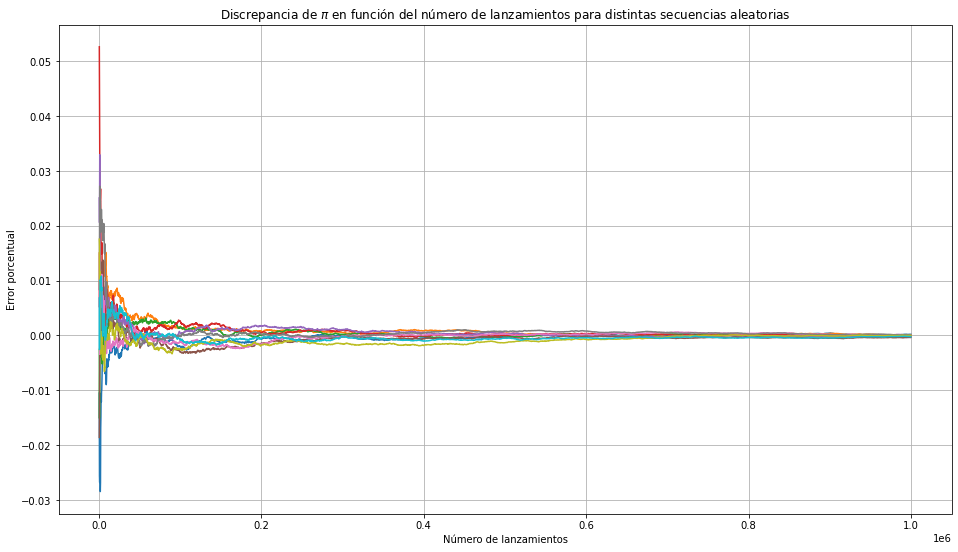

In [176]:
discrepancia(1000000, 10)

El comportamiento de la discrepancia es similar al esperado.

In [167]:
def discrepancia_buffon(Nmax):
    
    blist = []
    bllist = []
    N = []
    
    for i in tqdm(np.linspace(10, Nmax, 20)):
        errb = (np.pi - Buffon(1, Nmax)) / np.pi
        blist.append(errb)
        errbl = (np.pi - BuffonLaplace(1, Nmax)) / np.pi
        bllist.append(errbl)
        
        N.append(i)
    
    plt.title("Valor estimado en funcion del número de lanzamientos")
    plt.plot(N, blist,'.', label= "Buffon")
    plt.plot(N, bllist,'.', label = "Buffon-Laplace")
    plt.grid()
    plt.legend()

100%|███████████████████████████████████████████| 20/20 [20:59<00:00, 62.97s/it]


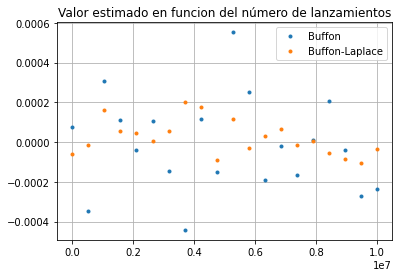

In [168]:
discrepancia_buffon(10000000)

En este caso, no hay una clara similitud con los resultados que se obtuvieron en el artículo, lo cual podría deberse a la diferencia en el número de puntos usados. El número de puntos aqui presentado es el adecuado para el tiempo que se tuvo que esperar para su procesamiento (más de 20 minutos).

**iii) Distribución Normal y exponencial**

In [196]:
def simple_uniform(L, N):
    """
    Función que calcula pi usando la proporción de áreas entre un cuadrado y un círculo.
    L: Longitud del cuadrado
    N: Número de lanzamientos
    """
    # Genera posiciones aleatorias dentro de un cuadrado de lado 2L
    X = np.random.uniform(-L, L, N)
    Y = np.random.uniform(-L, L, N)
    
    # Identifica los puntos que cumplen que están dentro del círculo
    puntos_buenos, = np.where((X**2 + Y**2) <= L**2)
    n = len(puntos_buenos)
    
    cantidad = []
    convergencia = []
    
    for j in np.linspace(1e4,len(puntos_buenos)-1,40):
            
            n = len(puntos_buenos[0:round(j)])
            N = puntos_buenos[round(j)]
            
            value = 4*n/N
            discr = (np.pi - value) / np.pi

            cantidad.append(N)
            convergencia.append(discr)
    
    #print(4*n/N)
    return cantidad, convergencia

def simple_normal(L, N):
    """
    Función que calcula pi usando la proporción de áreas entre un cuadrado y un círculo.
    L: Longitud del cuadrado
    N: Número de lanzamientos
    """
    # Genera posiciones aleatorias dentro de un cuadrado de lado 2L
    X = np.random.normal(0.27, 0.5, N)
    Y = np.random.normal(0.27, 0.5, N)
    
    # Identifica los puntos que cumplen que están dentro del círculo
    puntos_buenos, = np.where((X**2 + Y**2) <= L**2)
    n = len(puntos_buenos)
    
    cantidad = []
    convergencia = []
    
    for j in np.linspace(1e4,len(puntos_buenos)-1,40):
            
            n = len(puntos_buenos[0:round(j)])
            N = puntos_buenos[round(j)]
            
            value = 4*n/N
            discr = (np.pi - value) / np.pi

            cantidad.append(N)
            convergencia.append(discr)
    
    #print(4*n/N)
    return cantidad, convergencia

def simple_exp(L, N):
    """
    Función que calcula pi usando la proporción de áreas entre un cuadrado y un círculo.
    L: Longitud del cuadrado
    N: Número de lanzamientos
    """
    # Genera posiciones aleatorias dentro de un cuadrado de lado 2L
    X = np.random.exponential(0.42, N)
    Y = np.random.exponential(0.42, N)
    
    # Identifica los puntos que cumplen que están dentro del círculo
    puntos_buenos, = np.where((X**2 + Y**2) <= L**2)
    n = len(puntos_buenos)
    
    cantidad = []
    convergencia = []
    
    for j in np.linspace(1e4,len(puntos_buenos)-1,40):
            
            n = len(puntos_buenos[0:round(j)])
            N = puntos_buenos[round(j)]
            
            value = 4*n/N
            discr = (np.pi - value) / np.pi

            cantidad.append(N)
            convergencia.append(discr)
    
    #print(4*n/N)
    return cantidad, convergencia

def discrepancia_dist(Nmax):
    L = 1
    plt.figure(figsize = (16,9))
    plt.grid()
    
    N, uni = simple_uniform(1, Nmax)
    N, exp = simple_exp(1, Nmax)
    N, norm = simple_normal(1, Nmax)
        
    plt.title("Discrepancia de $\pi$ en función del número de lanzamientos para distintos tipos de distribuciones")
    plt.xlabel("Número de lanzamientos")
    plt.ylabel("Error porcentual")
    plt.plot(N, uni, label = 'uniforme')
    plt.plot(N, norm, label = 'normal')
    plt.plot(N, exp, label = 'exponencial')
    plt.legend()

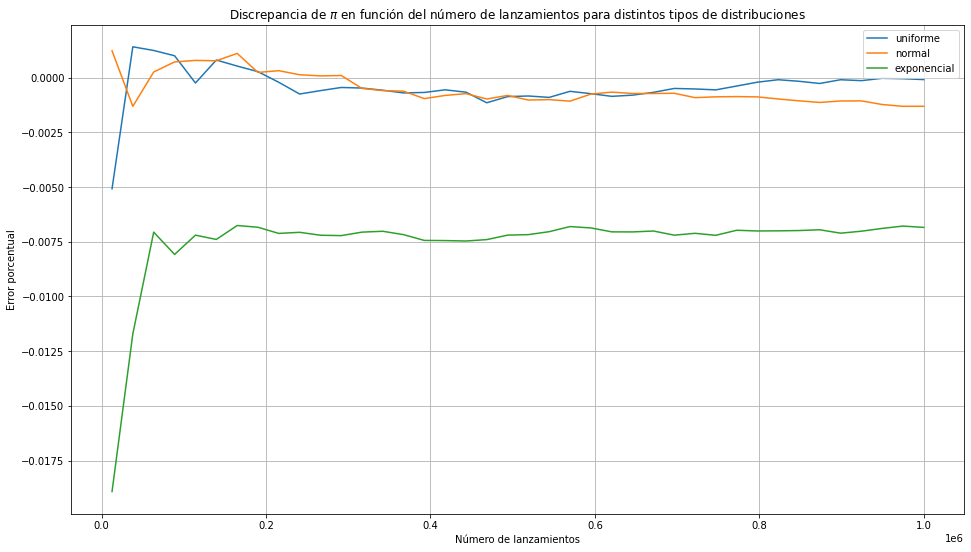

In [198]:
discrepancia_dist(1000000)

Al igual que en el artículo, 2 de las distribuciones tienden a un valor cercano a cero, y la otra también tiende a un valor pero distinto.

In [193]:
def simple_normal(L, N, mu = 0.27, sigma = 0.5):
    # Genera posiciones aleatorias dentro de un cuadrado de lado 2L
    X = np.random.normal(mu, sigma, N)
    Y = np.random.normal(mu, sigma, N)
    
    puntos_buenos, = np.where((X**2 + Y**2) <= L**2)
    n = len(puntos_buenos)
    
    #print(4*n/N)
    return 4*n/N

def simple_exp(L, N, beta = 0.42):
    X = np.random.exponential(beta, N)
    Y = np.random.exponential(beta, N)
    
    # Identifica los puntos que cumplen que están dentro del círculo
    puntos_buenos, = np.where((X**2 + Y**2) <= L**2)
    n = len(puntos_buenos)
    
    #print(4*n/N)
    return 4*n/N

100%|████████████████████████████████████████| 300/300 [00:01<00:00, 156.34it/s]


El valor medio obtenido para π es 3.144012666666667 con una desviación estándar de 0.005267025937113103


3.144012666666667

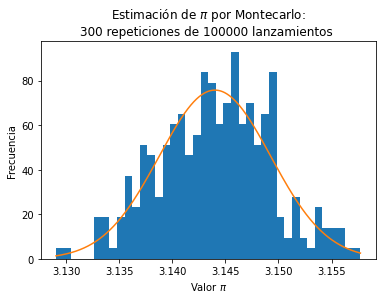

In [194]:
dist_lim(simple_normal, 1, 100000, 300)

100%|████████████████████████████████████████| 300/300 [00:01<00:00, 197.92it/s]

El valor medio obtenido para π es 3.1632393333333333 con una desviación estándar de 0.0052090643646969526


3.1632393333333333

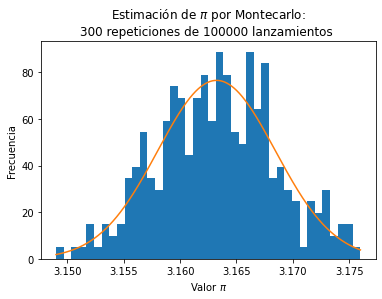

In [195]:
dist_lim(simple_exp, 1, 100000, 300)

Los resultados van acordes a los del artículo y a las conclusiones, i.e, la distribución sigue siendo normal, a pesar de que el valor medio ya no es el esperado.

In [165]:
def dist_lim_buffon(L, N, n):
    """
    Función que devuelve el histograma de la distribución del valor de pi obtenido.
    N: Número de lanzamientos (argumento de la función)
    L: Tamaño del espacio (argumento de la función)
    n: Número de iteraciones para el histograma
    """
    
    
    pi_values_buffon = np.zeros(n)
    pi_values_laplace = np.zeros(n)
    
    for i in tqdm(range(n)):
        pi_values_buffon[i] = Buffon(L, N)
        pi_values_laplace[i] = BuffonLaplace(L, N)
    
    plt.figure(figsize=(16,9))
    fig, (ax1, ax2) = plt.subplots(1,2)
    
    ax1.hist(pi_values_buffon, bins = 40, density=True)
    ax2.hist(pi_values_laplace, bins = 40, density=True)
    
    ax1.set_xlabel("Valor $\pi$")
    ax1.set_ylabel("Frecuencia")
    
    ax2.set_xlabel("Valor $\pi$")
    ax2.set_ylabel("Frecuencia")
    
    # Gráfica de la gaussiana
    
    vv1 = np.linspace(min(pi_values_buffon), max(pi_values_buffon), 5000)
    vv2 = np.linspace(min(pi_values_laplace), max(pi_values_laplace), 5000)
    
    media1 = pi_values_buffon.mean()
    desvest1 = pi_values_buffon.std()
    
    media2 = pi_values_laplace.mean()
    desvest2 = pi_values_laplace.std()
    
    ax1.plot(vv1, norm.pdf(vv1, media1, desvest1))
    ax2.plot(vv2, norm.pdf(vv2, media2, desvest2))

100%|████████████████████████████████████████| 200/200 [00:00<00:00, 422.07it/s]


<Figure size 1152x648 with 0 Axes>

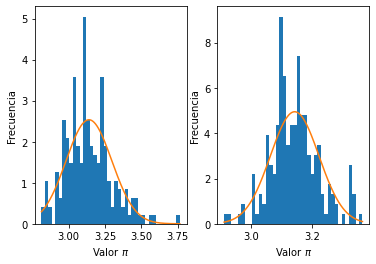

In [166]:
dist_lim_buffon(1, 2**8, 200)

En el histograma con Buffon vemos discrepancias con lo reportado en el artículo, lo cual es debido a que indican que el cálculo se hizo con $2^8$ lanzamientos, sin embargo, de acuerdo con el título de las gráficas, usaron en realidad $2 \times 10^8$, lo cual explicaría las diferencias.